# **MINI PROJECT Dillah Rismawati G5501211016**

In [1]:
using XLSX
using DataFrames
using CSV
using VegaDatasets
using Turing
using Distributions
using HypothesisTests
using Plots
using ARCHModels
using StatsBase
using VegaLite, VegaDatasets
using TSAnalysis
using Optim
using Measures

# Deskripsi Data

In [2]:
Data1 = CSV.read("Data 1.CSV", DataFrame)
using Dates
Data1[!,1]=Date.(Data1[:,1], "UU yyyy")
Data1

,Waktu,WIKA,BISI,BSDE,NIKL
,Date,Int64,Int64,Int64,Int64
1,2010-01-01,292,1540,780,255
2,2010-02-01,310,1380,566,235
3,2010-03-01,324,1480,566,295
4,2010-04-01,394,1810,780,340
5,2010-05-01,329,1280,640,270
6,2010-06-01,398,1340,668,295
7,2010-07-01,500,1470,752,315
8,2010-08-01,546,1700,761,310
9,2010-09-01,620,2250,891,380


In [3]:
dropmissing(Data1);

In [4]:
WIKA=Data1[:,2];
BISI=Data1[:,3];
BSDE=Data1[:,4];
NIKL=Data1[:,5];

In [5]:
describe(Data1)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Waktu,,2010-01-01,,2020-12-01,0,Date
2,WIKA,1700.45,292,1797.5,3468,0,Int64
3,BISI,1259.92,490,1327.5,2350,0,Int64
4,BSDE,1386.02,566,1417.5,2220,0,Int64
5,NIKL,1103.74,50,335.0,5125,0,Int64


In [6]:
Mean = CSV.read("Rataan.CSV", DataFrame);

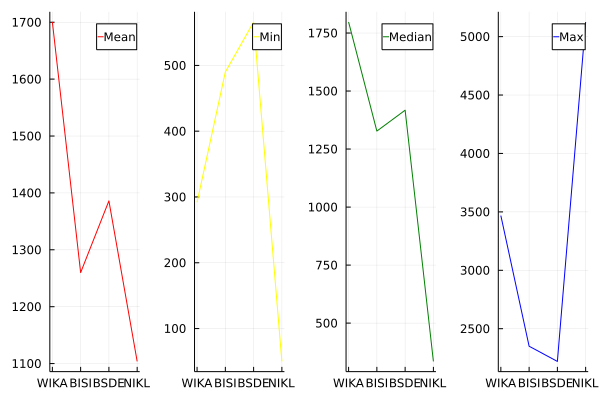

In [7]:
q1=plot(Mean[:,1],Mean[:,2], label="Mean", color="red")
q2=plot(Mean[:,1],Mean[:,3], label="Min", color="yellow")
q3=plot(Mean[:,1],Mean[:,4], label="Median", color="green")
q4=plot(Mean[:,1],Mean[:,5], label="Max", color="blue")
plot(q1,q2,q3,q4, layout=(1,4))

# Line Plot

In [8]:
gr()

Plots.GRBackend()

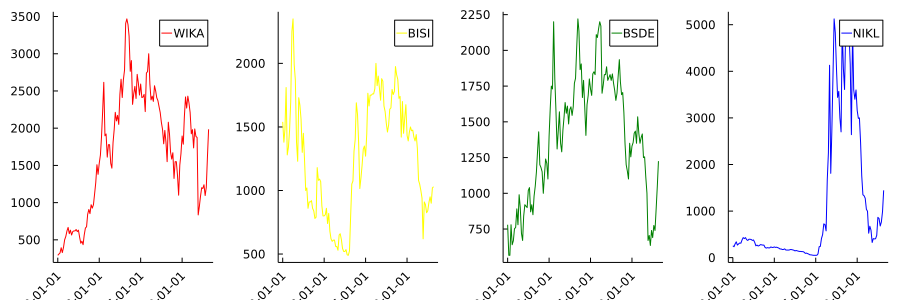

In [9]:
x1= Data1[:,1];
y1= WIKA;
y2= BISI;
y3= BSDE;
y4= NIKL;
p1=plot(x1,y1, label="WIKA", xrotation=45, color="red")
p2=plot(x1,y2, label="BISI", xrotation=45, color="yellow")
p3=plot(x1,y3, label="BSDE", xrotation=45, color="green")
p4=plot(x1,y4, xrotation=45, label="NIKL", color="blue")
plot(p1,p2,p3,p4, layout=(1,4), size=(900,300), grid=false)

Dari plot diatas terlihat untuk keempat jenis saham mengalami fluktuasi pada harganya pada rentang tahun 2010-2020. Dalam rentang tersebut, saham NIKL mengalami kenaikan yang sangat drastis di sekitar awal tahun 2017. Berdasarkan informasi dari Bisnis.com, saham emiten berkode NIKL ini ditutup merosot 24.35% atau 940 poin ke posisi Rp. 2.920 per lembar saham pada jumat(17/2/2017). Pelemahan ini terjadi saat IHSG ditutup melemah 0.5% atau 27.07 poin ke posisi 5,350. 93.
untuk saham WIKA fluktuasinya mengalami kenaikan di tahun 2012-2016 kemudian turun dan kembali naik di tahun 2019. Berbeda dengan saham NIKL,saham BSDE yang cenderung stabil (kenaikan tidak terlalu signifikan), sedangkan untuk saham BISI cenderung stabil pada rentang 2010-2014 dan setelah itu mengalami kenaikan harga di tahun 2015.

# Violin Plot

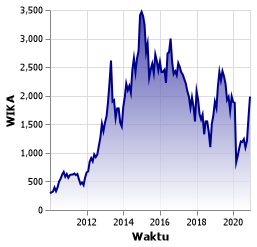

In [10]:
p1= Data1 |>
@vlplot(
    mark={:area,
    line={color="darkblue"},
    color={x1=1,y1=1,x2=1,y2=0,gradient=:linear,
    title="Harga Saham WIKA",
    stops=[{offset=0,color="white"},{offset=1,color="darkblue"}]}},
    x="Waktu:t",
    y="WIKA:q"
)

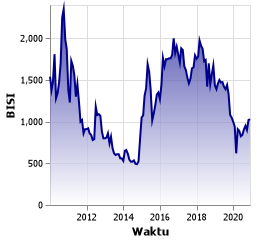

In [11]:
p2= Data1 |>
@vlplot(
    mark={:area,
    line={color="darkblue"},
    color={x1=1,y1=1,x2=1,y2=0,gradient=:linear,
    stops=[{offset=0,color="white"},{offset=1,color="darkblue"}]}},
    x="Waktu:t",
    y="BISI:q"
)

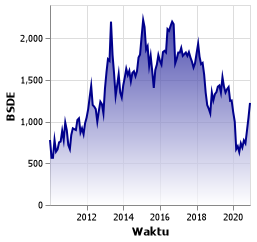

In [12]:
p3= Data1 |>
@vlplot(
    mark={:area,
    line={color="darkblue"},
    color={x1=1,y1=1,x2=1,y2=0,gradient=:linear,
    stops=[{offset=0,color="white"},{offset=1,color="darkblue"}]}},
    x="Waktu:t",
    y="BSDE:q"
)

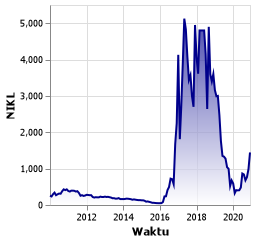

In [13]:
p4= Data1 |>
@vlplot(
    mark={:area,
    line={color="darkblue"},
    color={x1=1,y1=1,x2=1,y2=0,gradient=:linear,
    stops=[{offset=0,color="white"},{offset=1,color="darkblue"}]}},
    x="Waktu:t",
    y="NIKL:q"
)

# Analisis Model ARCH/GARCH pada Pemodelan Harga Saham Bulanan PT. Wijaya Karya (Persero) Tbk. periode 2010-2020

Langkah-Langkah :
1.  Identifikasi model
2. Uji Akar Root menggunakan Augmented Dickey-Fuller Test (ADF Test)
3. Identifikasi Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)
4. Pembentukan model ARIMA
5. Verifikasi model ARIMA ,Asumsi yang harus dipenuhi adalah :Kenormalan sisaan (uji JarqueBera), Kehomogenan ragam (dilihat dari plot ACF dan PACF, Kebebasan sisaan (uji Ljung-Box)
6. Peramalan (forecasting) data saham PT WIKA Tbk. untuk 12 bulan kedepan
7. Pendugaan parameter ARCH dan GARCH
8. Menghitung volatilitas


# Identifikasi model

Load data yang akan dipakai untuk forecasting, dalam hal ini akan dipakai data harga saham WIKA dari tahun 2010-2019 dan akan dilakukan peramalan untuk 12 bulan ke depan 

In [14]:
DataAmatan=Data1[1:120,2]
#Vector{Float64}(DataAktual)

120-element Vector{Int64}:
  292
  310
  324
  394
  329
  398
  500
  546
  620
  667
  583
  630
  565
    ⋮
 1895
 1785
 2150
 2420
 2270
 2430
 2340
 2210
 1925
 1980
 1735
 1990

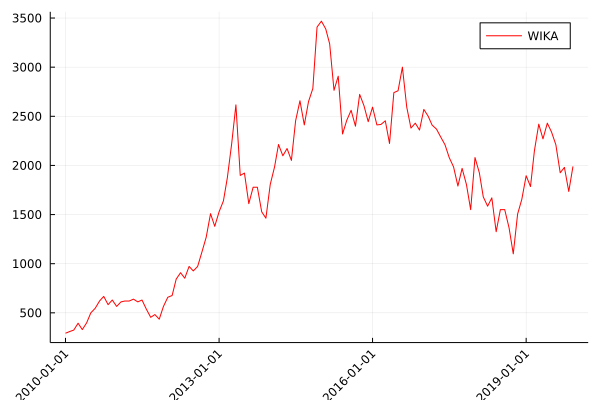

In [15]:
x1= Data1[1:120,1];
y1= DataAmatan;
p1=plot(x1,y1, label="WIKA", xrotation=45, color="red")

Terlihat dari plot diatas bahwa data hargasaham WIKA tidak stasioner, ditunjukan oleh perbedaan fluktuasi (tidak menyebar di sekitar nilai tengah), sehingga perlu dilakukan penstasioneran terlebih dahulu

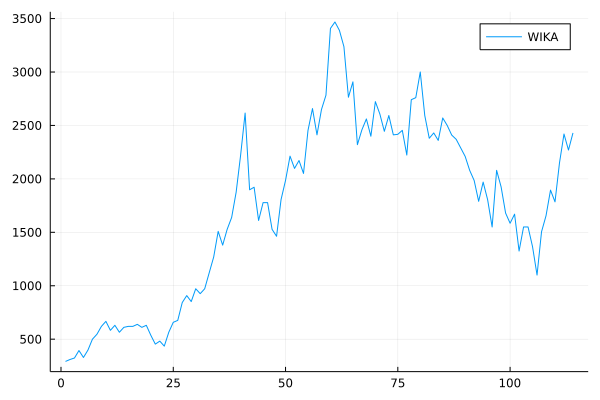

In [16]:
# Split into training and test sets. 
train_percentage = 0.95
s_train = DataAmatan[1:floor(Int, train_percentage*length(DataAmatan))]
N = length(s_train)

# Plot the training data
plot(s_train, label="WIKA")


# Testing for stationarity and differencing the time series

Augmented Dickey-Fuller unit root test
Hipotesis:
1. H_0= ada unit root, data tidak stasioner dalam rataan
1. H_1= tidak ada unit root, data stasioner dalam rataan

In [17]:
ADFTest(s_train, Symbol("constant"), 5)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0465946

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4022

Details:
    sample size in regression:          108
    number of lags:                     5
    ADF statistic:                      -1.75659
    Critical values at 1%, 5%, and 10%: [-3.48906 -2.88725 -2.58048]


Karena hipotesis yang dilakukan gagal untuk menolak H0, maka kesimpulannya data WIKA tersebut tidak stasioner dalam rataan sehingga perlu dilakukan differencing sampai orde untuk mencapai kestasioneran terpenuhi

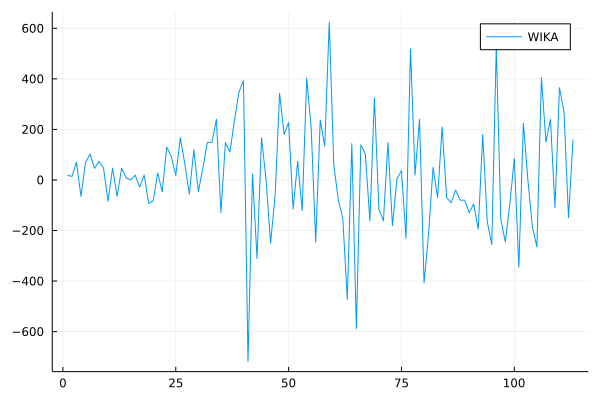

In [18]:
#orde 1
s_diff = diff(s_train)
plot(s_diff, label="WIKA")

Augmented Dickey-Fuller unit root test
Hipotesis:
1. H_0= ada unit root, data tidak stasioner dalam rataan
1. H_1= tidak ada unit root, data stasioner dalam rataan

In [19]:
ADFTest(s_diff, Symbol("constant"), 5)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.08754

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     0.0013

Details:
    sample size in regression:          107
    number of lags:                     5
    ADF statistic:                      -4.02529
    Critical values at 1%, 5%, and 10%: [-3.48959 -2.88748 -2.5806]


Hasil uji ADF Test menunjukkan tolak H0, maka kesimpulannya data saham WIKA tersebut sudah tidak ada unit root atau data terebut sudah stasioner setelah dilakukan differencing satu kali

# # Analysing the ACF and PACF plots to determine AR and MA parameters

Plot ACF dan PACF digunakan untuk menentukan orde dari modelnya. Plot ACF dan PACF digunakan untuk menentukan orde dari modelnya. ACF berfungsi untuk mengukur korelasi antar pengamatan dengan jeda k, sedangkan PACF mengukur korelasi dengan jeda k dan mengontrol korelasi antar dua pengamatan dengan jeda kurang dari k (Kelikume & Salami 2014). Sebelumnya telah diketahui bahwa data stasioner setelah dilakukan pembedaan (differencing) satu kali, sehingga dapat diketahui orde d = 1

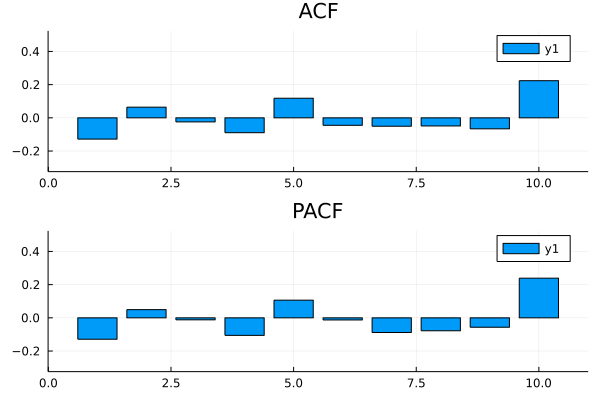

In [20]:
#Plot ACF and PACF plots
total_lags = 10
s1 = bar(collect(1:total_lags), autocor(s_diff, collect(1:total_lags)), title = "ACF", ylim = [-0.3,0.5])
s2 = bar(collect(1:total_lags), pacf(s_diff, collect(1:total_lags)), title = "PACF", ylim = [-0.3,0.5])
plot(s1, s2, layout = (2, 1))

Plot ACF dan PACF diatas menunjukkan bahwa nilai autokorelasi plot ACF data harga saham WIKA 120
periode terdapat cuts off setelah lag 1, dan pada plot PACF terlihat bahwa nilai autokorelasi parsial cuts off lag 1, sehingga nilai parameter Ma dan AR adalah MA(1) dan AR(1), maka model ARIMA yang terbentuk adalah ARIMA(1,1,1)

# Defining the model and Sampling

# Model ARIMA

In [21]:
Y = DataAmatan |> JArray{Float64}
Y = permutedims(Y);
Y=Matrix(Y)

1×120 Matrix{Union{Missing, Float64}}:
 292.0  310.0  324.0  394.0  329.0  398.0  …  1925.0  1980.0  1735.0  1990.0

In [22]:
# Estimation settings for an ARIMA(1,1,1)
d = 1;
p = 1;
q = 1;
arima_settings = ARIMASettings(Y, d, p, q);

# Estimation
arima_out1 = arima(arima_settings, NelderMead(), Optim.Options(iterations=1000, f_tol=1e-2, x_tol=1e-2, g_tol=1e-2, show_trace=true, show_every=500));

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     2.642467e+06     3.189418e+04
 * time: 0.031000137329101562


In [23]:
# Estimation settings for an ARIMA(2,1,1)
d1 = 1;
p1 = 2;
q1 = 1;
arima_settings1 = ARIMASettings(Y, d1, p1, q1);

# Estimation
arima_out2 = arima(arima_settings1, NelderMead(), Optim.Options(iterations=1000, f_tol=1e-2, x_tol=1e-2, g_tol=1e-2, show_trace=true, show_every=500));


Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     2.642446e+06     2.866700e+04
 * time: 0.0


In [24]:
# Estimation settings for an ARIMA(1,1,2)
d2 = 1;
p2 = 1;
q2 = 2;
arima_settings2 = ARIMASettings(Y, d2, p2, q2);

# Estimation
arima_out3= arima(arima_settings2, NelderMead(), Optim.Options(iterations=10000, f_tol=1e-2, x_tol=1e-2, g_tol=1e-2, show_trace=true, show_every=500));

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     2.642446e+06     2.866398e+04
 * time: 0.0


In [25]:
# Estimation settings for an ARIMA(2,1,2)
d3 = 1;
p3 = 2;
q3 = 2;
arima_settings3 = ARIMASettings(Y, d3, p3, q3);

# Estimation
arima_out4 = arima(arima_settings3, NelderMead(), Optim.Options(iterations=10, f_tol=1e-2, x_tol=1e-2, g_tol=1e-2, show_trace=true, show_every=500));

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     2.642425e+06     2.625190e+04
 * time: 0.0


Dari hasil pengujian beberapa model ARIMA yang mungkin, didapatkan data:
1. RMSE ARIMA(1,1,1)=3.189418e+04
2. RMSE ARIMA(2,1,1)=2.866700e+04
3. RMSE ARIMA(1,1,2)=2.866700e+04
4. RMSE ARIMA(2,1,2)=2.625190e+04
terlihat bahwa ARIMA (2,1,2) memiliki nilai RMSE terkecil, sehingga model terbaik yang dapat dipilih adalah ARIMA(2,1,2)

# Verifikasi Model ARIMA

In [26]:
#L-jung Box test untuk uji kebebasan residual
#H0= tidak ada korelasi residual antar leg
#H1= paling sedikit ada satu korelasi residual antar leg
println(LjungBoxTest(s_diff,10))

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.2347

Details:
    number of observations:         113
    number of lags:                 10
    degrees of freedom correction:  0
    Q statistic:                    12.8068



karena gagal untuk menolak H0, maka kesimpulannya tidak ada korelasi residual antar leg. 

In [27]:
#uji Jarque-Bera
#H0=Residual berdistribusi normal
#H1=Residual tidak berdistribusi normal
println(JarqueBeraTest(s_diff))

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.17802824128071726 and 4.238105778398395"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0201

Details:
    number of observations:         113
    JB statistic:                   7.81434



hasil ujinya adalah tolak h0, maka residual tidak berdistribusi normal yang menandakan bahwa ada efek ARCH dalam model

# Forecasting 12 bulan ke depan

In [28]:
# 12-step ahead forecast
max_hz = 12;
fc = forecast(arima_out4, max_hz, arima_settings3)
fc'

12×1 adjoint(::Matrix{Float64}) with eltype Float64:
 1998.264404896393
 2003.2818369807017
 2004.2750583542181
 2004.2678937025682
 2004.2689256103981
 2004.2689063806124
 2004.2689075944274
 2004.2689075615217
 2004.2689075630733
 2004.2689075630233
 2004.2689075630253
 2004.268907563025

In [29]:
DataVS = CSV.read("VS.CSV", DataFrame)
using Dates
DataVS[!,1]=Date.(DataVS[:,1], "UU yyyy")
DataVS

,Waktu,Aktual,forecast
,Date,Int64,Int64
1,2020-01-01,1890,1998
2,2020-02-01,1875,2003
3,2020-03-01,835,2004
4,2020-04-01,950,2004
5,2020-05-01,1085,2004
6,2020-06-01,1200,2004
7,2020-07-01,1190,2004
8,2020-08-01,1240,2004
9,2020-09-01,1095,2004


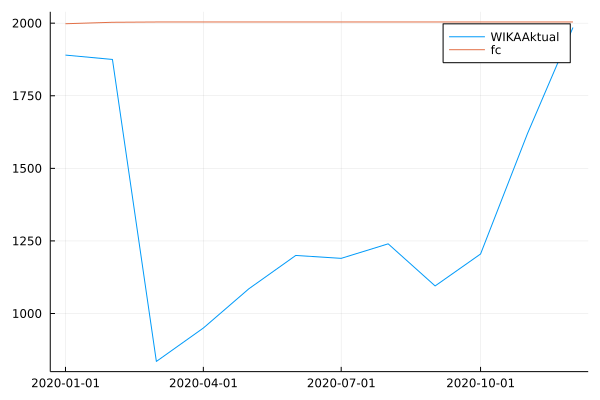

In [30]:
plot(DataVS[:,1],DataVS[:,2], label="WIKAAktual")
plot!(DataVS[:,1],DataVS[:,3], label="fc")

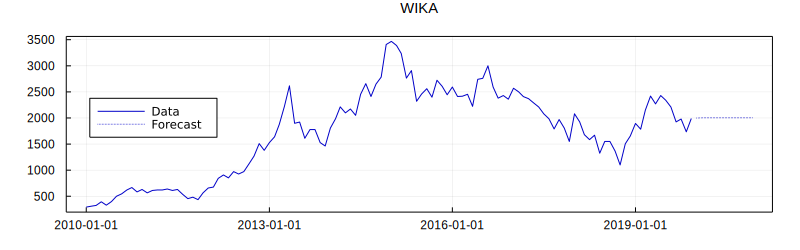

In [31]:
# Extend date vector
date_ext = Data1[1:120,1] |> Array{Date,1};

for hz=1:max_hz
    last_month = month(date_ext[end]);
    last_year = year(date_ext[end]);

    if last_month == 12
        last_month = 1;
        last_year += 1;
    else
        last_month += 1;
    end

    push!(date_ext, Date("01/$(last_month)/$(last_year)", "dd/mm/yyyy"))
end

# Generate plot
p_arima = plot(date_ext, [Y[1,:]; NaN*ones(max_hz)], label="Data", color=RGB(0,0,200/255),
               xtickfont=font(8, "Helvetica Neue"), ytickfont=font(8, "Helvetica Neue"),
               title="WIKA", titlefont=font(10, "Helvetica Neue"), framestyle=:box,
               legend=:left, size=(800,250), dpi=300, margin = 5mm);

plot!(date_ext, [NaN*ones(length(date_ext)-size(fc,2)); fc[1,:]], label="Forecast", color=RGB(0,0,200/255), line=:dot)

# Identifikasi Efek ARCH dalam model

Hipotesis LMTest:
1. H0 : tidak ada efek ARCH dalam Model
2. H1 : Aada efek ARCH dalam model

In [32]:
#LMTest
ARCHLMTest(DataAmatan,50)

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          110.812

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-05

Details:
    sample size:                    120
    number of lags:                 50
    LM statistic:                   110.812


karena hasil test menunjukkan tolak H0, maka mengindikasikan bahwa ada efek ARCH dalam model

# pendugaan parameter ARCH/GARCH

In [34]:
 datafit=fit(GARCH{1,1},Vector{Float64}(s_diff))


GARCH{1, 1} model with Gaussian errors, T=113.

Mean equation parameters:
─────────────────────────────────────────
   Estimate  Std.Error  z value  Pr(>|z|)
─────────────────────────────────────────
μ   16.8992    12.1626  1.38944    0.1647
─────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
ω   730.216     625.785      1.16688    0.2433
β₁    0.634305    0.0873461  7.26198    <1e-12
α₁    0.457441    0.143877   3.17938    0.0015
──────────────────────────────────────────────


In [35]:
am = fit(GARCH{1, 1}, Vector{Float64}(s_diff));

predict.(am, :volatility, 1:12)


12-element Vector{Float64}:
 232.51885634328178
 187.14681376172155
 151.47960698668376
 123.6326199973863
 102.10575021304383
  85.69257031941402
  73.40337377339993
  64.40408830844083
  57.976213532741205
  53.500170865984806
  50.455595909932555
  48.425291938586504